In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Импотрируем необходимые библиотеки

In [ ]:
import random

class Array:

    def __init__(self, size_x : int = None, size_y : int = None, data : list[list] | None = None) -> None:
        if not data:
            if not isinstance(size_x, int):
                raise TypeError(f"Expectected int type, got {type(size_x)} instead")
            if not isinstance(size_y, int):
                raise TypeError(f"Expectected int type, got {type(size_y)} instead")
        self.size_x = size_x
        self.size_y = size_y
        if size_x is None and size_y is None and data:
            self.data = data
            self.size_x = len(data)
            self.size_y = len(data[0])
        elif size_x == 0 or self.size_y == 0:
            self.data = [[]]
        elif data:
            if isinstance(data, list) and isinstance(data[0], list):
                if len(data) != size_x or len(data[0]) != size_y:
                    raise ValueError("Given sizes do not match data sizes")
                self.data = data
            else: raise TypeError("Unsupported data type")
        else:
            self.data = [[0 for j in range(size_y)] for i in range(size_x)]


    def __getitem__(self, i) -> list:
        return self.data[i]


    def __neg__(self) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] = -self[i][j]

        return self


    def len_x(self) -> int:
        return self.size_x


    def len_y(self) -> int:
        return self.size_y


    def resize(self, new_x : int, new_y : int) -> object:
        if(new_x < self.size_x) or (new_y < self.size_y):
            raise TypeError(
                f"Can't resize 2D array sized {self.size_x}x{self.size_y} to {new_x}x{new_y}")
        for i in self.data:
            for _ in range(new_y - self.size_y):
                i.append(0)

        for _ in range(new_x):
            self.data.append([0 for i in range(new_y)])

        self.size_x = new_x
        self.size_y = new_y

        return self


    def __eq__(self, __value: object) -> bool:
        return self.data == __value.data


    def __add__(self, __value : object) -> object:
        if type(self) != type(__value):
            raise TypeError(f"Can't add a 2D array to {type(__value)}")
        if (self.size_x != __value.size_x) or (self.size_y != __value.size_y):
            raise ValueError("2D arrays have diffirent size")

        for i in range(self.size_x):
            for j in range(self.size_y):
                self.data[i][j] += __value[i][j]

        return self


    def __sub__(self, __value : object) -> object:
        if type(self) != type(__value):
            raise TypeError(f"Can't subtract {type(__value)} for 2D array")
        if (self.size_x != __value.size_x) or (self.size_y != __value.size_y):
            raise ValueError("2D arrays have diffirent size")

        for i in range(self.size_x):
            for j in range(self.size_y):
                self.data[i][j] -= __value[i][j]

        return self

    def div_(self, __value : int) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] = __value / self[i][j]
        return self

    def __str__(self) -> str:
        s = ""
        for i in range(self.size_x):
            for j in range(self.size_y):
                s += f"{self[i][j]} "
                if j == self.size_y - 1 and i != self.size_x - 1:
                    s += "\n"
        return s

    def random_data(self, _min=0, _max=20) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self.data[i][j] = random.randint(_min, _max)

        return self


    def abs_(self) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] = abs(self[i][j])

        return self

    def sum_(self) -> float:
        s = 0
        for i in range(self.size_x):
            for j in range(self.size_y):
                s += self[i][j]

        return s

    def transpose(self) -> object:
        new_x = self.size_y
        new_y = self.size_x

        new_list = Array(new_x, new_y)
        for i in range(new_x):
            for j in range(new_y):
                new_list.data[i][j] = self.data[j][i]

        return new_list


    def det(self) -> int:
        if self.size_x != self.size_y:
            raise ValueError(
                f"Can't count the determinant for 2D array sized {self.size_x}x{self.size_y}")
        swaps = 0
        det = 1

        for i in range(self.size_x):
            if self[i][i] == 0:
                id = i + 1
                while (id < self.size_x) and (self[id][i] == 0):
                    id += 1
                if id == self.size_x:
                    return 0
                swaps += 1
                self.data[id], self.data[i] = self[i], self[id]
            det *= self[i][i]
            inverse = 1 / self[i][i]
            for j in range(i, self.size_x):
                self[i][j] *= inverse
            for next in range(i + 1, self.size_x):
                ratio = self[next][i]
                for j in range(i, self.size_x):
                    self[next][j] -= self[i][j] * ratio

        return det if swaps % 2 == 0 else -det


    def reverse(self):
        det = self.det()
        if self.size_x == 2:
            return Array(2, 2, [[self[1][1] / det, -self[0][1] / det],
                                [-self[1][0] / det, self[0][0] / det]])


    def __truediv__(self, __value : float | object) -> object:
        if isinstance(__value, float):
            for i in range(self.size_x):
                for j in range(self.size_y):
                    self[i][j] /= __value

            return self
        elif type(__value) == type(self):
            result = Array(self.size_x, self.size_y)
            for i in range(result.size_x):
                result[i][i] = 1
            for i in range(__value.size_x):
                leading = __value[i][i]
                if leading == 0:
                    for j in range(__value.size_y):
                        __value[i][j] += 1
                        result[i][j] += 1
                if leading != 1:
                    for j in range(__value.size_y):
                        __value[i][j] /= leading
                        result[i][j] /= leading

                for k in range(__value.size_x):
                    if k != i:
                        ratio = __value[k][i]
                        for j in range(__value.size_y):
                            __value[k][j] -= ratio * __value[i][j]
                            result[k][j] -= ratio * result[i][j]

            return result * self
        else:
            raise TypeError("Only can divivde 2D array by int or 2D array")


    def _append(self, __value : list) -> object:
        new_list = Array(self.size_x, self.size_y)
        new_list.data = self.data.copy()

        if not isinstance(__value, list):
            raise TypeError(f"Expected a list, got {type(__value)} instead")
        if len(__value) != new_list.size_y:
            raise ValueError("Can't add a list to an array as they have different lenght")

        new_list.data.append(__value)
        new_list.size_x += 1

        return new_list


    def mean(self, option : int | None =None) -> float | object:
        if option is None:
            lenght = self.size_x * self.size_y
            s = 0
            for i in range(self.size_x):
                s += sum(self[i][j] for j in range(self.size_y))
            return s / lenght

        if option == 0:
            result = Array(1, self.size_y)
            for j in range(self.size_y):
                result[-1][j] = sum(self[i][j] for i in range(self.size_x)) / self.size_x
            return result

        if option == 1:
            result = Array(1, self.size_x)
            for j in range(self.size_x):
                result[-1][j] = sum(self[j][i] for i in range(self.size_y)) / self.size_y
            return result.transpose()


    def __mul__(self, __value : float | object) -> object:
        if isinstance(__value, float):
            for i in range(self.size_x):
                for j in range(self.size_y):
                    self.data[i][j] *= __value
            return self
        if type(__value) == type(self):
            if self.size_y != __value.size_x:
                raise ValueError(
                    f"Can't multiply 2D array sized {self.size_x}x{self.size_y} with 2D array sized {__value.size_x}x{__value.size_y}")
            result = Array(self.size_x, __value.size_y)
            for i in range(result.size_x):
                for j in range(result.size_y):
                    result.data[i][j] = sum(self[i][k] * __value[k][j]
                                            for k in range(__value.size_x))
            return result
        raise TypeError("Only can multiply 2D array with int or 2D array")


    def __pow__(self, n : int) -> object:
        for _ in range(n - 1):
            self *= self
        return self



    def pow_(self, __value : int) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] **= __value

        return self


    def unique(self, coloum : int):
        if not isinstance(coloum, int):
            raise TypeError("A coloum index can only be int")
        if coloum > self.size_y or coloum < 0:
            raise ValueError("Given coloum number doesn't exit in 2D array")
        unique = set()
        for i in range(self.size_x):
            unique.add(self[i][coloum])

        return unique


    def select_rows(self, indices : list) -> object:
        selected_data = [self[i] for i in indices]

        return Array(data=selected_data)


    def select_columns(self, indices: list) -> object:
        selected_data = [[row[i] for i in indices] for row in self.data]
        return Array(data=selected_data)


#a = Array(1, 2, [[2, 2]])

Реализуем дешевую копию numpy

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
data = sns.load_dataset('iris')

Загрузим датасет

In [ ]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


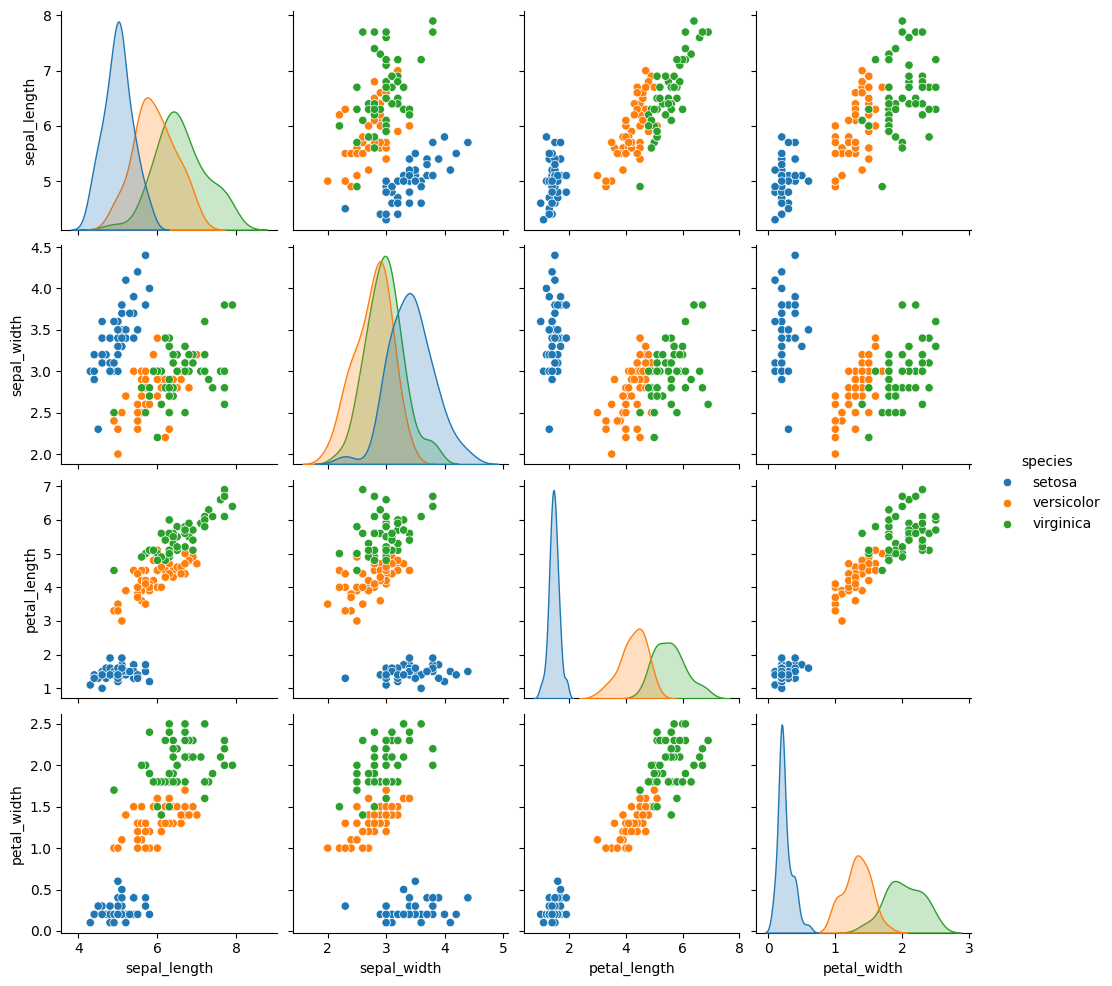

In [ ]:
sns.pairplot(data=data, hue = 'species')

Выберем 2 признака, которые наиболее лучшим образом "разделяют" 3 класса + посмотрим на распределение классов для каждого признака и поймем, что лучше всего выбрать petal_length и petal_width

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
encode = {'setosa' : 0, 'versicolor' : 1, 'virginica' : 2}
data = data.replace({'species' : encode})

Закодируем классы

In [ ]:
data = data.drop(['sepal_length', 'sepal_width'], axis = 1)

Оставим только те признаки, которые мы выбрали

In [ ]:
transform, head = [], []
for i in data:
  head.append(i)
  transform.append(data[i].to_list())

In [ ]:
transformed_data = Array(data=transform)
transformed_data = transformed_data.transpose()

In [ ]:
print(transformed_data[:5])

[[1.4, 0.2, 0], [1.4, 0.2, 0], [1.3, 0.2, 0], [1.5, 0.2, 0], [1.4, 0.2, 0]]


In [ ]:
class Distance_functions:

    @staticmethod
    def euclidian_distance(a : list, b : list) -> float:
        s = 0
        for i, x in enumerate(a):
            s += (x - b[i]) ** 2
        return s

class Kernel_functions:


    @staticmethod
    def gaussinan_kernel(x : float) -> float:
        return math.exp(-x * x * 2) * ((math.pi * 2) ** -1)

    @staticmethod
    def biquadratic_kernel(x : float) -> float:
        return 0 if abs(x) > 1 else (15 * (1 - x * x ) ** 2) / 16

    @staticmethod
    def epanechnikov_kernel(x : float) -> float:
        return 0 if abs(x) > 1 else (3 * (1 - x * x) ** 2) / 4


class Knn_base:

    def __init__(self, k : int) -> None:
      self.k = k
      self.data = None

In [ ]:
class Knn(Knn_base):

    def __init__(self, k) -> None:
        super().__init__(k)


    def fit(self, data : list[list]) -> None:
        self.data = data


    def get_nn(self, point : list, dist_function) -> int:
        distances = []
        for row in self.data:
            distances.append((dist_function(row[:-1], point), row))
        distances.sort(key=lambda x: x[0])

        return [distances[i][1] for i in range(self.k)]


    def predict(self, point : list, dist_function=Distance_functions.euclidian_distance) -> int:
        neigbours = self.get_nn(point, dist_function)
        predictions = [row[-1] for row in neigbours]

        return max(set(predictions), key=predictions.count)


Пусть нам надо предсказать класс нового обьекта $u$. Мы хотим найти $k$ близжайших к $u$ в плане расстояния $ ρ : 𝕏 \times 𝕏 \rightarrow [0, +∞)$. Тогда класс мы определим следующим образом: $$a(u) = argmax_{y_i ∈ Y} ∑_{i=1}^{l} [y_u^{(i)} = y] w_i $$
$w_i = [i ≤ k]$

In [ ]:
model = Knn(2)
model.fit(transformed_data)
print(model.predict(transformed_data[0][:-1]))
print(transformed_data[0][-1])

0
0


In [ ]:
class weighted_Knn(Knn_base):

    def __init__(self, k, q = 1) -> None:
        super().__init__(k)
        self.q = q


    def fit(self, data : object) -> None:
        self.data = data


    def get_nn(self, point : list, dist_function) -> list:
        distances = []
        for row in self.data:
            distances.append((dist_function(row[:-1], point), row))
        distances.sort(key=lambda x: x[0])

        return [distances[i][1] for i in range(self.k)]


    def predict(self, point : list, dist_function=Distance_functions.euclidian_distance) -> int:
        label_dict = {}
        labels_set = set(self.data.transpose()[-1])
        neigbours = self.get_nn(point, dist_function)
        predictions = [row[-1] for row in neigbours]
        for i in labels_set:
            label_dict[i] = 0

        c = 1
        for i in predictions:
            label_dict[i] += c
            c *= self.q

        return max(label_dict, key=lambda x : label_dict[x])

Во взвешенном формула имеет немного другой вид: $$a(u) = arg \max_{y_i \in Y} ∑_{i=1}^{k} w_i [y_u^{(i)} = y], $$
$w_i = q^i$, где $q$ - гиперпараметр, $0 < q < 1$ - экспоненциально затухающие веса \\
$w_i = \frac{k + 1 - i}{k} $ - линейно затухающие веса

In [ ]:
model = weighted_Knn(4, 0.3)
model.fit(transformed_data)
print(model.predict(transformed_data[0][:-1]))
print(transformed_data[0][-1])

0
0


In [ ]:
import math

class Parzen_window(Knn_base):

    def __init__(self, k : int, h : float = 1) -> None:
        super().__init__(k)
        self.h = h


    def fit(self, data : object) -> None:
        self.data = data


    def get_nn(self, point : list, dist_function) -> list:
        distances = []
        for row in self.data:
            distances.append((dist_function(row[:-1], point), row))
        distances.sort(key=lambda x: x[0])

        return distances[:self.k]


    def predict(self, point : list,
                kernel = Kernel_functions.gaussinan_kernel,
                dist_function = Distance_functions.euclidian_distance):
        label_dict = {}
        labels_set = set(self.data.transpose()[-1])
        a = self.get_nn(point, dist_function)
        print(a)
        distances = [i[0] for i in a]
        neigbours = [i[1] for i in a]
        predictions = [row[-1] for row in neigbours]
        for i in labels_set:
            label_dict[i] = 0

        for i in range(len(predictions)):
            label_dict[predictions[i]] += kernel(distances[i] / self.h)

        return max(label_dict, key=lambda x : label_dict[x])

В алгоритме Парзеновского окна вес является некоторой функцией от расстояния:
$$w_i = K(\frac{ρ(u, x_u^{(i)})}{h}),$$
где $K$ - ядерная функция, она положительна на своей области определения и монотонно не возрастает, $h$ - гиперпараметр - ширина окна, влияет на качество модели. При слишком маленькой ширине модель сильно подстраивается под обучающую выборку и теряет свою обобщающую способность. При слишком большой ширине, напротив, модель становится слишком простой.

In [ ]:
class Parzen_window_adaptive(Knn_base):

    def __init__(self, k : int) -> None:
        super().__init__(k)


    def fit(self, data : object) -> None:
        self.data = data


    def get_nn(self, point : list, dist_function) -> list:
        distances = []
        for row in self.data:
            distances.append((dist_function(row[:-1], point), row))
        distances.sort(key=lambda x: x[0])

        return distances[:self.k + 1]


    def predict(self, point : list,
                kernel = Kernel_functions.gaussinan_kernel,
                dist_function = Distance_functions.euclidian_distance):
        label_dict = {}
        labels_set = set(self.data.transpose()[-1])
        a = (model.get_nn(point, dist_function))
        #print(a)
        b = a[-1]
        a = a[:-1]
        distances = [i[0] for i in a]
        neigbours = [i[1] for i in a]
        predictions = [row[-1] for row in neigbours]
        for i in labels_set:
            label_dict[i] = 0

        for i in range(len(predictions)):
            label_dict[predictions[i]] += kernel(distances[i] / (b[0] + 1e-20))

        return max(label_dict, key=lambda x : label_dict[x])

Адаптивное Парзеновское окно отличается тем, что тут ширина окна - расстояние до $k + 1$ соседа:
$$w_i = K(\frac{ρ(u, x_u^{(i)})}{ρ(u, x_u^{(k+1)})})$$

In [ ]:
model = Parzen_window(4, 1)
model.fit(transformed_data)
print(model.predict(transformed_data[0][:-1]))
print(transformed_data[0][-1])

[(0.0, [1.4, 0.2, 0]), (0.0, [1.4, 0.2, 0]), (0.0, [1.4, 0.2, 0]), (0.0, [1.4, 0.2, 0])]
0
0


In [ ]:
def leave_one_out_basic(data : object, k: int, classifier : object) -> float:
  n = len(data)
  num_correct_predicts = 0
  for i in range(n):
    data[0], data[i] = data[i], data[0]

    knn_classifier = classifier(k)
    knn_classifier.fit(Array(data=data[1:]))
    if knn_classifier.predict(data[0][:-1]) == data[0][-1]:
      num_correct_predicts += 1
    else:
      print(data[0])

  return num_correct_predicts / n

Leave-one-out кроссвалидания \\
Пусть $∃ X^l$ - матрица признаков. Мы хотим $ ∀ i = \overline{1, l} $ проверить предсказание модели на объекте $x_i$, используя данные - $X^l / \{x_i\}$. Очень действенно для KNN, так как если проверять на $X^l$, то ближайший сосед $x_i$-того объекта - сам $x_i$

In [ ]:
data = [*transformed_data]

In [ ]:
from copy import deepcopy

In [ ]:
leave_one_out_basic(data, 1, Knn)

[4.8, 1.8, 1]
[5.1, 1.6, 1]
[4.5, 1.6, 1]
[4.5, 1.7, 2]
[5.0, 1.5, 2]
[4.8, 1.8, 2]
[4.8, 1.8, 2]


0.9533333333333334

In [ ]:
ks = range(1, 10)
loo_score = [leave_one_out_basic(deepcopy(data), k, Knn) for k in ks]

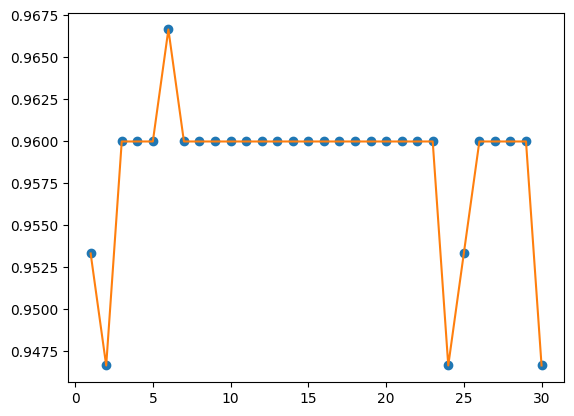

In [ ]:
plt.plot(ks, loo_score, 'o', ks, loo_score)

Построим график зависимости $k$-$loo \space score$, чтобы выбрать самый оптимальный $k$

In [ ]:
result = list(zip(ks, loo_score))
result

[(1, 0.9533333333333334),
 (2, 0.9466666666666667),
 (3, 0.96),
 (4, 0.96),
 (5, 0.96),
 (6, 0.9666666666666667),
 (7, 0.96),
 (8, 0.96),
 (9, 0.96),
 (10, 0.96),
 (11, 0.96),
 (12, 0.96),
 (13, 0.96),
 (14, 0.96),
 (15, 0.96),
 (16, 0.96),
 (17, 0.96),
 (18, 0.96),
 (19, 0.96),
 (20, 0.96),
 (21, 0.96),
 (22, 0.96),
 (23, 0.96),
 (24, 0.9466666666666667),
 (25, 0.9533333333333334),
 (26, 0.96),
 (27, 0.96),
 (28, 0.96),
 (29, 0.96),
 (30, 0.9466666666666667)]

Наилучшее $k$-6

In [ ]:
def leave_one_out_weighted(data : object, k: int, classifier : object, q : float) -> float:
  n = len(data)
  num_correct_predicts = 0
  for i in range(n):
    data[0], data[i] = data[i], data[0]

    knn_classifier = classifier(k, q)
    knn_classifier.fit(Array(data=data[1:]))
    if knn_classifier.predict(data[0][:-1]) == data[0][-1]:
      num_correct_predicts += 1

  return num_correct_predicts / n

In [ ]:
ks = range(1, 31)
qs = [i / 10 for i in range(1, 11)]
loo_score = []
result = []
for k in ks:
  for q in qs:
    calc = leave_one_out_weighted(deepcopy(data), k, weighted_Knn, q)
    loo_score.append(calc)
    result.append((k, q, calc))

Сделаем такие же операции уже для Weighted KNN, только в этот раз у нас два **гиперпараметра** - $k$ и $q$

In [ ]:
k_values = [i[0] for i in result]
q_values = [i[1] for i in result]
loo = [i[2] for i in result]

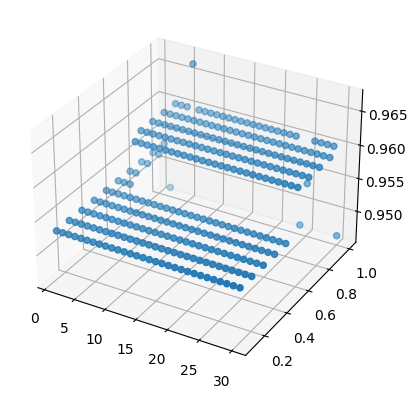

In [ ]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(k_values, q_values, loo)
plt.show()

In [ ]:
sorted(result, key=lambda x: x[2])[::-1][:3]

[(6, 1.0, 0.9666666666666667), (30, 0.9, 0.96), (30, 0.8, 0.96)]

Наишучшие значения $k$-6, $q$-1

In [ ]:
def make_classification_map(best_model : object, data : list) -> None:
  x1, x2 = [], []
  for i in data:
    x1.append(i[0])
    x2.append(i[1])

  min_x, max_x = min(x1), max(x1)
  min_y, max_y = min(x2), max(x2)
  all_points = []
  for i in range(int(min_x * 10), int((max_x + 1) * 10)):
    for j in range(int(min_y * 10), int((max_y + 1) * 10)):
      all_points.append([i / 10, j / 10])

  y = []
  for i in all_points:
    y.append(model.predict(i))

  df = pd.DataFrame(data={'Petal-length' : [point[0] for point in all_points], 'Petal-width' : [point[1] for point in all_points], 'Species' : y})
  sns.scatterplot(data=df, x='Petal-length', y='Petal-width', hue='Species', palette="deep")
  plt.show()


In [ ]:
model = Knn(6)
model.fit(data)

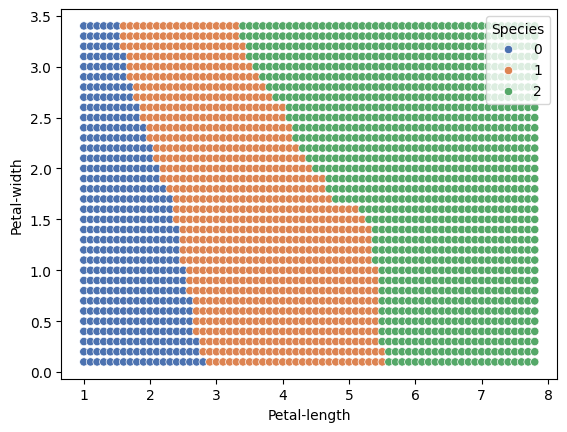

In [ ]:
make_classification_map(model, data)

Карта классификации - строим всевозможные обьекты, которые могут быть поданы в качестве пары признаков нашему алгоритму и классифицируем их. В качестве модели используем KNN с наилучшим $k$-6

In [ ]:
def make_classification_map_weighted(best_model : object, data : list) -> None:
  x1, x2 = [], []
  for i in data:
    x1.append(i[0])
    x2.append(i[1])

  min_x, max_x = min(x1), max(x1)
  min_y, max_y = min(x2), max(x2)
  all_points = []
  for i in range(int(min_x * 10), int((max_x + 1) * 10)):
    for j in range(int(min_y * 10), int((max_y + 1) * 10)):
      all_points.append([i / 10, j / 10])

  y = []
  for i in all_points:
    y.append(model.predict(i))

  df = pd.DataFrame(data={'Petal-length' : [point[0] for point in all_points], 'Petal-width' : [point[1] for point in all_points], 'Species' : y})
  sns.scatterplot(data=df, x='Petal-length', y='Petal-width', hue='Species', palette="deep")
  plt.show()

In [ ]:
model = weighted_Knn(6, 0.9)
model.fit(Array(data=data))

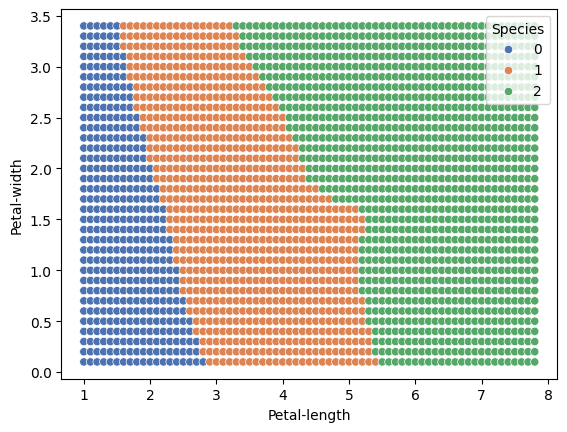

In [ ]:
make_classification_map_weighted(model, data)

Так как для $q$=1 взвешенный KNN не будет отличатся от обычного, возьмем $q$=0.9

In [ ]:
def leave_one_out_parzen(data : object, k: int, classifier : object, h : float) -> float:
  n = len(data)
  num_correct_predicts = 0
  for i in range(n):
    data[0], data[i] = data[i], data[0]

    knn_classifier = classifier(k, h)
    knn_classifier.fit(Array(data=data[1:]))
    if knn_classifier.predict(data[0][:-1]) == data[0][-1]:
      num_correct_predicts += 1

  return num_correct_predicts / n

In [ ]:
ks = range(1, 31)
hs = [0.1, 0.4, 0.6, 0.7, 1, 2, 3, 4, 5, 6, 7]
loo_score = []
result = []
for k in ks:
  for h in hs:
    calc = leave_one_out_parzen(deepcopy(data), k, Parzen_window, h)
    loo_score.append(calc)
    result.append((k, h, calc))

Тут мы подбираем $k$ и $h$ - ширину окна

In [ ]:
k_values = [i[0] for i in result]
h_values = [i[1] for i in result]
loo = [i[2] for i in result]

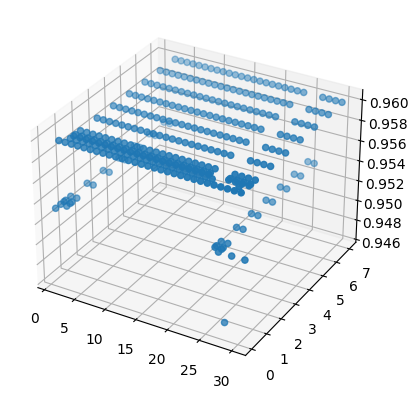

In [ ]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(k_values, h_values, loo)
plt.show()

In [ ]:
sorted(result, key=lambda x: x[1])[::-1][:5]

[(30, 7, 0.96),
 (29, 7, 0.96),
 (28, 7, 0.96),
 (27, 7, 0.96),
 (26, 7, 0.9533333333333334)]

Ширина окна и $k$ - ни на что не влияют

In [ ]:
def leave_one_out_parzen_test_kernels(data : object, k: int, classifier : object, h : float, kernel : object) -> float:
  n = len(data)
  num_correct_predicts = 0
  for i in range(n):
    data[0], data[i] = data[i], data[0]

    knn_classifier = classifier(k, h)
    knn_classifier.fit(Array(data=data[1:]))
    if knn_classifier.predict(data[0][:-1], kernel=kernel) == data[0][-1]:
      num_correct_predicts += 1

  return num_correct_predicts / n

Мы нашли оптимальные **гиперпараметры**, теперь поэксперементрием с ядерной функцией $K$

In [ ]:
kernels = [Kernel_functions.gaussinan_kernel, Kernel_functions.biquadratic_kernel, Kernel_functions.epanechnikov_kernel]

In [ ]:
ks = range(1, 31)
loo_score = [leave_one_out_parzen_test_kernels(deepcopy(data), k, Parzen_window, 7, kernels[2]) for k in ks]

Text(0.5, 1.0, 'Gaussian kernel')

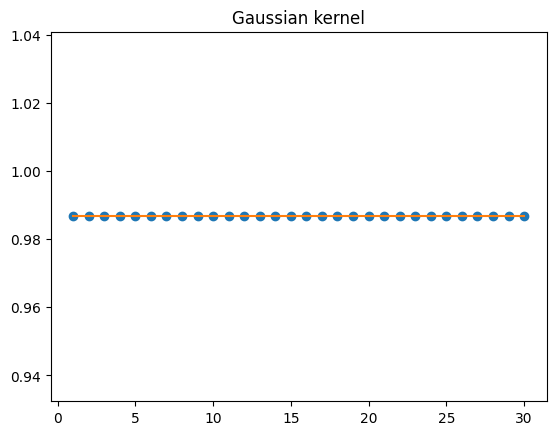

In [ ]:
plt.plot(ks, loo_score, 'o', ks, loo_score)
plt.title("Gaussian kernel")

Text(0.5, 1.0, 'Biquadratic kernel')

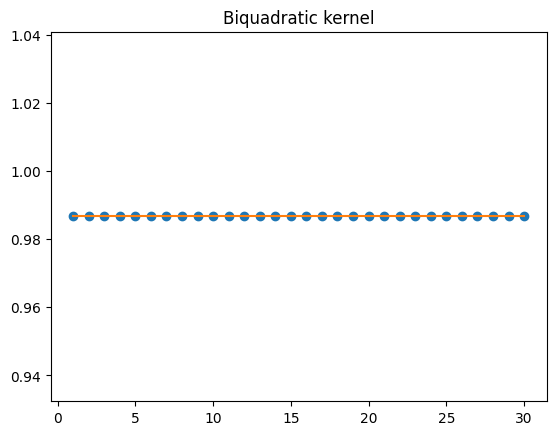

In [ ]:
plt.plot(ks, loo_score, 'o', ks, loo_score)
plt.title("Biquadratic kernel")

Text(0.5, 1.0, 'Epanechnikov kernel')

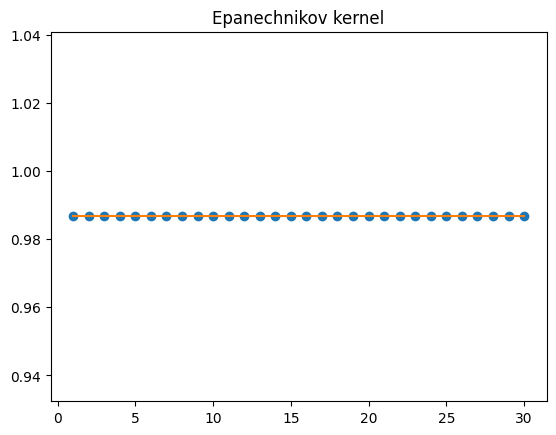

In [ ]:
plt.plot(ks, loo_score, 'o', ks, loo_score)
plt.title("Epanechnikov kernel")

Она тоже ни на что не влияет...

In [ ]:
def leave_one_out_parzen_adaptive(data : object, k: int, classifier : object) -> float:
  n = len(data)
  num_correct_predicts = 0
  for i in range(n):
    data[0], data[i] = data[i], data[0]

    knn_classifier = classifier(k)
    knn_classifier.fit(Array(data=data[1:]))
    if knn_classifier.predict(data[0][:-1]) == data[0][-1]:
      num_correct_predicts += 1

  return num_correct_predicts / n

In [ ]:
ks = range(1, 31)
loo_score = [leave_one_out_parzen_adaptive(deepcopy(data), k, Parzen_window) for k in ks]

Text(0.5, 1.0, 'Adaptive Parzen window')

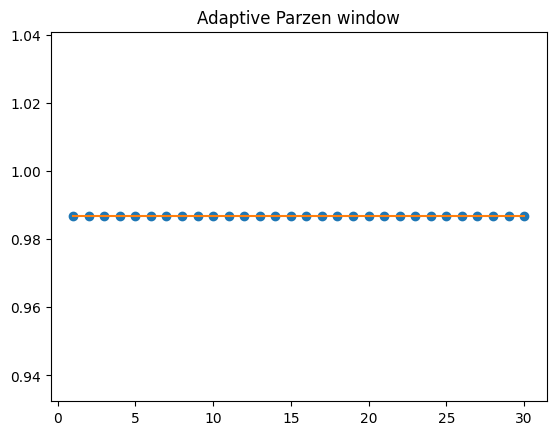

In [ ]:
plt.plot(ks, loo_score, 'o', ks, loo_score)
plt.title("Adaptive Parzen window")

In [ ]:
def make_classification_map_parzen(best_model : object, data : list) -> None:
  x1, x2 = [], []
  for i in data:
    x1.append(i[0])
    x2.append(i[1])

  min_x, max_x = min(x1), max(x1)
  min_y, max_y = min(x2), max(x2)
  all_points = []
  for i in range(int(min_x * 10), int((max_x + 1) * 10)):
    for j in range(int(min_y * 10), int((max_y + 1) * 10)):
      all_points.append([i / 10, j / 10])

  y = []
  for i in all_points:
    y.append(model.predict(i))

  df = pd.DataFrame(data={'Petal-length' : [point[0] for point in all_points], 'Petal-width' : [point[1] for point in all_points], 'Species' : y})
  sns.scatterplot(data=df, x='Petal-length', y='Petal-width', hue='Species', palette="deep")
  plt.show()

In [ ]:
model = Parzen_window(30, 7)
model.fit(transformed_data)

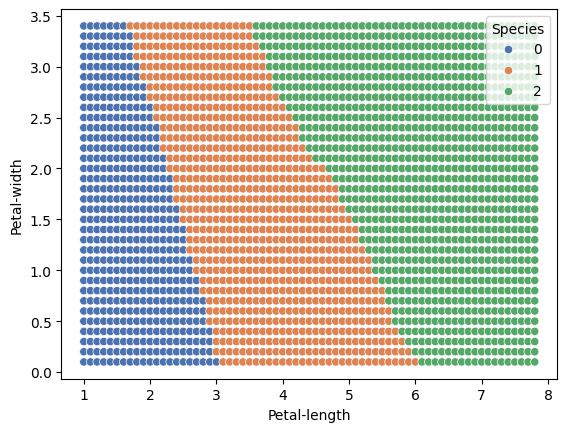

In [ ]:
make_classification_map_parzen(model, data)

In [ ]:
model = Parzen_window_adaptive(10)
model.fit(transformed_data)

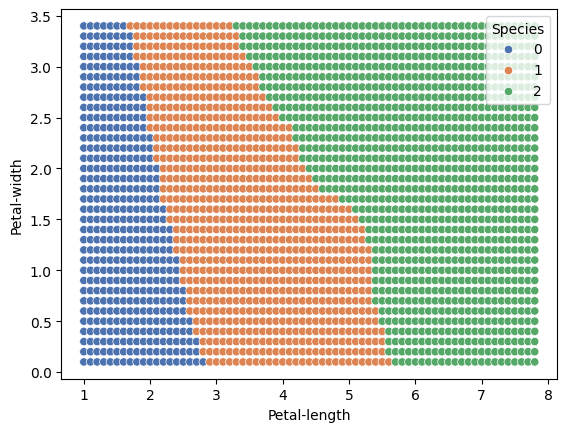

In [ ]:
make_classification_map_parzen(model, data)